# Matrix inverses

It is often conceptually convenient to talk about the *inverse* $A^{-1}$ of a matrix $A$, which exists **for any non-singular square matrix**.   This is the matrix such that $x = A^{-1}b$ solves $Ax = b$ for any $b$.   The inverse is conceptually convenient becuase it allows us to move matrices around in equations *almost* like numbers (except that matrices don't commute!).

Another way of defining the inverse of a matrix involves the *identity* matrix $I$.   Here is a $ 5 \times 5$ identity matrix:

$$
I = \begin{pmatrix} 1&0&0&0&0 \\ 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0 \\ 0&0&0&0&1 \end{pmatrix}
= \begin{pmatrix} e_1 & e_2 & e_3 & e_4 & e_5 \end{pmatrix}
$$

where the columns $e_1 \cdots e_5$ of $I$ are the **unit vectors** in each component.

The identity matrix, which can be constructed by `eye(5)` in Julia, has the property that $Ix=x$ for any $x$, and hence $IA = A$ for any (here $5 \times 5$) matrix $A$:

In [1]:
A = [4  -2  -7  -4  -8
     9  -6  -6  -1  -5
    -2  -9   3  -5   2
     9   7  -9   5  -8
    -1   6  -3   9   6] # a randomly chosen 5x5 matrix

5×5 Array{Int64,2}:
  4  -2  -7  -4  -8
  9  -6  -6  -1  -5
 -2  -9   3  -5   2
  9   7  -9   5  -8
 -1   6  -3   9   6

In [2]:
b = [-7,2,4,-4,-7] # a randomly chosen right-hand side

5-element Array{Int64,1}:
 -7
  2
  4
 -4
 -7

In [3]:
I₅ = eye(Int, 5)

5×5 Array{Int64,2}:
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1

In [4]:
I₅ * b == b

true

In [5]:
I₅ * A == A

true

The inverse matrix $A^{-1}$ is the matrix such that $A^{-1} A = A A^{-1} = I$.

Why does this correspond to solving $Ax=b$?  Multiplying both sides on the *left* by $A^{-1}$ (multiplying on the *right* would make no sense: we can't multiply vector×matrix!), we get 

$$
A^{-1}Ax=Ix = x = A^{-1}b
$$

How do we find $A^{-1}$?  The key is the equation $A A^{-1} = I$, which looks just like $AX=B$ for the **right-hand sides consisting of the columns of the identity matrix**, i.e. the unit vectors.   So, we just solve $Ax=e_i$ for $i=1,\ldots,5$, or equivalently do `A \ I` in Julia.  Of course, Julia comes with a built-in function `inv(A)` for computing $A^{-1}$ as well:

In [6]:
inv(A)

5×5 Array{Float64,2}:
  0.0109991   0.529789  -0.908341  -0.635197  -0.0879927
  0.131989    0.35747   -0.900092  -0.622365  -0.055912 
 -0.235564   -0.179652   0.370302   0.353804  -0.11549  
 -0.301558   -0.69172    1.48701    1.16499    0.0791323
  0.2044      0.678582  -1.29667   -1.05408    0.0314696

In [7]:
A \ [1, 0, 0, 0, 0] # should give first column of A⁻¹

5-element Array{Float64,1}:
  0.0109991
  0.131989 
 -0.235564 
 -0.301558 
  0.2044   

In [8]:
Ainv = A \ I₅

5×5 Array{Float64,2}:
  0.0109991   0.529789  -0.908341  -0.635197  -0.0879927
  0.131989    0.35747   -0.900092  -0.622365  -0.055912 
 -0.235564   -0.179652   0.370302   0.353804  -0.11549  
 -0.301558   -0.69172    1.48701    1.16499    0.0791323
  0.2044      0.678582  -1.29667   -1.05408    0.0314696

In [9]:
Ainv - inv(A)

5×5 Array{Float64,2}:
  2.10942e-15   2.44249e-15  -2.88658e-15  -2.66454e-15   4.996e-16  
  1.88738e-15   2.77556e-15  -3.21965e-15  -2.55351e-15   5.27356e-16
 -8.04912e-16  -9.99201e-16   1.88738e-15   1.11022e-15  -1.94289e-16
 -3.83027e-15  -4.32987e-15   5.9952e-15    5.55112e-15  -7.63278e-16
  3.16414e-15   3.66374e-15  -5.32907e-15  -4.44089e-15   6.73073e-16

(The difference is just roundoff errors.)

In [10]:
Ainv * A

5×5 Array{Float64,2}:
  1.0          -8.32667e-15  -1.49325e-14  -4.88498e-15  -1.0103e-14 
  1.46549e-14   1.0          -1.82077e-14  -2.22045e-15  -1.15463e-14
 -6.02296e-15  -1.77636e-15   1.0          -1.11022e-15   5.55112e-15
 -1.58068e-14   1.4877e-14    2.36478e-14   1.0           1.4877e-14 
  1.38639e-14  -7.68829e-15  -2.05808e-14  -5.77316e-15   1.0        

(Again, we get $I$ up to roundoff errors because the computer does arithmetic only to 15–16 significant digits.)

In [11]:
A * Ainv

5×5 Array{Float64,2}:
  1.0           8.88178e-16   0.0           0.0          -5.55112e-17
  4.44089e-16   1.0           0.0          -8.88178e-16   0.0        
  1.72085e-15  -4.21885e-15   1.0          -4.88498e-15  -1.08247e-15
 -4.44089e-15   2.66454e-15   5.32907e-15   1.0           7.77156e-16
 -3.10862e-15   8.88178e-16  -1.77636e-15   5.32907e-15   1.0        

Normally, $AB \ne BA$ for two matrices $A$ and $B$.  Why can we multiply $A$ by $A^{-1}$ on either the left or right and get the same answer $I$?  It is fairly easy to see why:

$$
A A^{-1} = I \implies A A^{-1} A = IA = A = A (A^{-1} A)
$$

Since $A (A^{-1} A) = A$, and $A$ is non-singular (so there is a unique solution to this system of equations), we must have $A^{-1} A = I$.

In [12]:
[A\b Ainv*b] # print the two results side-by-side

5×2 Array{Float64,2}:
  0.505958   0.505958
 -0.928506  -0.928506
  2.16407    2.16407 
  1.46166    1.46166 
 -1.26428   -1.26428 

Another example, from class (and the textbook), where we applied the Gauss–Jordan algorithm to invert a matrix.  Let's plug it in to check that we didn't make a mistake:

In [13]:
inv([ 2 -1  0
     -1  2 -1
      0 -1  2])

3×3 Array{Float64,2}:
 0.75  0.5  0.25
 0.5   1.0  0.5 
 0.25  0.5  0.75

Matrix inverses are funny, however:

* Inverse matrices are very convenient in *analytical* manipulations, because they allow you to move matrices from one side to the other of equations easily.

* Inverse matrices are **almost never computed** in "serious" numerical calculations.  Whenever you see $A^{-1} B$ (or $A^{-1} b$), when you go to *implement* it on a computer you should *read* $A^{-1} B$ as "solve $AX = B$ by some method." e.g. solve it by `A \ B` or by first computing the LU factorization of $A$ and then using it to solve $AX = B$.

One reason that you don't usually compute inverse matrices is that it is wasteful: once you have $PA=LU$, you can solve $AX=B$ directly without bothering to find $A^{-1}$, and computing $A^{-1}$ requires much more work if you only have to solve a few right-hand sides.

Another reason is that for many special matrices, there are ways to solve $AX=B$ *much* more quickly than you can find $A^{-1}$.   For example, many large matrices in practice are [sparse](https://en.wikipedia.org/wiki/Sparse_matrix) (mostly zero), and often for sparse matrices you can arrange for $L$ and $U$ to be sparse too.  Sparse matrices are much more efficient to work with than general "dense" matrices because you don't have to multiply (or even store) the zeros. Even if $A$ is sparse, however, $A^{-1}$ is usually non-sparse, so you lose the special efficiency of sparsity if you compute the inverse matrix.

## Inverses and products

Inverses have a special relationship to matrix products:
$$
(AB)^{-1} = B^{-1} A^{-1}
$$

The reason for this is that we must have $(AB)^{-1} AB = I$, and it is easy to see that $B^{-1} A^{-1}$ does the trick.  Equivalently, $AB$ is the matrix that first multiplies by $B$ then by $A$; to invert this, we must *reverse the steps*: first multiply by the inverse of $A$ and then by the inverse of $B$.

In [14]:
C = rand(4,4)
D = rand(4,4)
inv(C*D)

4×4 Array{Float64,2}:
  3.33397    -0.864695  -5.07853    2.30222 
 -0.610383   -5.55326    3.72688    0.576318
  0.917264  -10.1433    -2.88068    7.55659 
 -4.75927    31.3349     6.79471  -19.0198  

In [15]:
inv(D)*inv(C)

4×4 Array{Float64,2}:
  3.33397    -0.864695  -5.07853    2.30222 
 -0.610383   -5.55326    3.72688    0.576318
  0.917264  -10.1433    -2.88068    7.55659 
 -4.75927    31.3349     6.79471  -19.0198  

# Complexity of Matrix Operations

With a little effort, we can figure out that the **number of arithmetic operations** for an $n\times n$ matrix **scales proportional to** (for large $n$):

* $n^2$ for: matrix `*` vector $Ax$, or solving a *triangular* system like $Ux=c$ or $Lc=b$ (back/forward substitution)
* $n^3$ for: matrix `*` matrix $AB$, LU factorization $PA=LU$, or solving a triangular system with $n$ right-hand sides like computing $A^{-1}$ from the LU factorization.

(In computer science, we would say that these have "complexity" $\Theta(n^2)$ and $\Theta(n^3)$, respectively.

Let's see how these predictions match up to reality:

In [16]:
Pkg.add("BenchmarkTools") # a useful package for benchmarking
using BenchmarkTools, Compat

INFO: Package BenchmarkTools is already installed
INFO: METADATA is out-of-date — you may not have the latest version of BenchmarkTools
INFO: Use `Pkg.update()` to get the latest versions of your packages


Measure the time for LU factorization of 10×10, 100×100, 500×500, 1000×1000, and 2000×2000 random real (double precision) matrices:

In [17]:
n = [10,100,500,1000,2000]
LinAlg.BLAS.set_num_threads(1) # benchmarking on multiple cores is weird
t = [@belapsed(lufact($(rand(n,n))), evals=1) for n in n]

5-element Array{Float64,1}:
 1.149e-6   
 0.000160689
 0.00394636 
 0.0257531  
 0.175274   

Now let's plot it on a log–log scale to see if it is the expected $n^3$ power law:

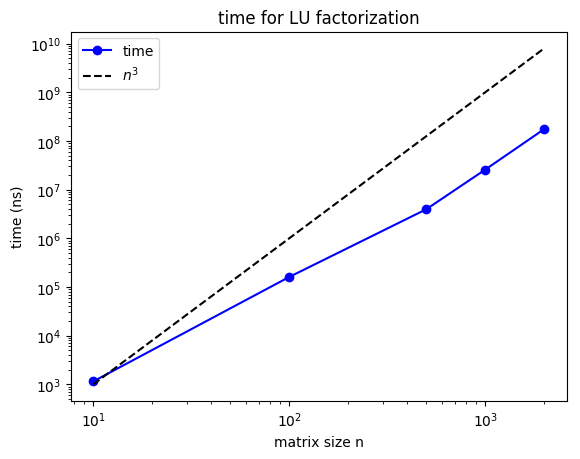

PyObject <matplotlib.text.Text object at 0x13f99f810>

In [18]:
using PyPlot
loglog(n, t*1e9, "bo-")
loglog(n, n.^3, "k--")
xlabel("matrix size n")
ylabel("time (ns)")
legend(["time", L"n^3"])
title("time for LU factorization")

It's pretty close!  For large $n$, you can see it starting to go parallel to the $n^3$ line.

The reason it is initially *better* than $n^3$ (i.e. it is faster than the $n^3$ dependence would suggest) is that there is apparently some overhead in setting up the matrix multiplication that adds a significant fraction of the time for small matrices, but is negligible for large matrices.

Let's also look at the time to *solve* $LUx=b$ when we are *given* the LU factors, which we predict should grow $\sim n^2$:

In [19]:
ts = [@belapsed($(lufact(rand(n,n))) \ $(rand(n))) for n in n]

5-element Array{Float64,1}:
 3.10107e-7 
 0.000157249
 0.000938176
 0.00192759 
 0.00616312 

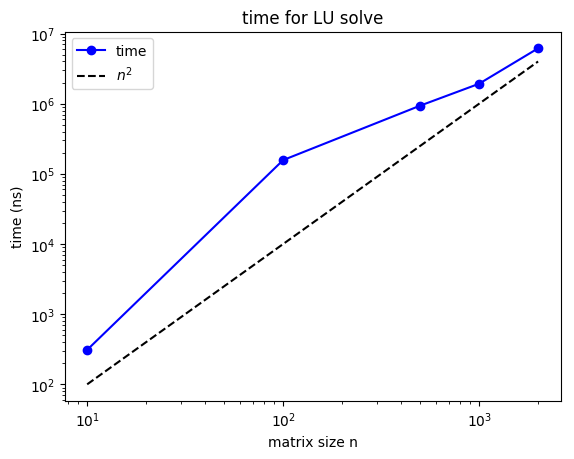

PyObject <matplotlib.text.Text object at 0x12a72de10>

In [20]:
loglog(n, ts*1e9, "bo-")
loglog(n, n.^2, "k--")
xlabel("matrix size n")
ylabel("time (ns)")
legend(["time", L"n^2"])
title("time for LU solve")

Yup, it's pretty close to the $n^2$ growth!  The key point is that, unless you have many ($\gtrsim n$) right-hand sides, most of the effort is spent in Gaussian elimination (finding L and U), *not* in the back/forward-substitution to solve $LUx=b$.

If we believe this scaling, how long would it take for my laptop to solve a $10^6 \times 10^6$ system of equations?

In [32]:
Dates.canonicalize(Dates.CompoundPeriod(Dates.Second(round(Int,t[end] * (1e6/2000)^3))))

36 weeks, 1 day, 13 hours, 54 minutes, 7 seconds

In fact, we **usually run out of memory before we run out of time:**

In [22]:
println((1e6)^2 * sizeof(Float64) / 2^30, " GiB for a 10⁶×10⁶ matrix")

7450.580596923828 GiB for a 10⁶×10⁶ matrix


In practice, people do *regularly* solve problems this large, and even larger, but they can do so because real matrices that big almost always have some **special structure** that allows you to solve them more quickly and store them more compactly.  For example, a common special structure is [sparsity](https://en.wikipedia.org/wiki/Sparse_matrix): matrices whose entries are *mostly zero*.  We will learn some basic ways to take advantage of this later in 18.06, and sparse-matrix methods are covered more extensively in 18.335.

# Transpose, Permutations, and Orthogonality

One special type of matrix for which we can solve problems much more quickly is a permutation matrix, introduced in the previous lecture on $PA=LU$ factorization.

In [23]:
# construct a permutation matrix P from the permutation vector p
function permutation_matrix(p)
    P = zeros(Int, length(p),length(p))
    for i = 1:length(p)
        P[i,p[i]] = 1
    end
    return P
end

permutation_matrix (generic function with 1 method)

In [24]:
P = permutation_matrix([2,4,1,5,3])

5×5 Array{Int64,2}:
 0  1  0  0  0
 0  0  0  1  0
 1  0  0  0  0
 0  0  0  0  1
 0  0  1  0  0

In [25]:
P * I₅

5×5 Array{Int64,2}:
 0  1  0  0  0
 0  0  0  1  0
 1  0  0  0  0
 0  0  0  0  1
 0  0  1  0  0

The inverse of any permutation matrix $P$ turns out to be its [transpose](https://en.wikipedia.org/wiki/Transpose) $P^T$: we just swap rows and columns.  In Julia, this is denoted `P'` (technically, this is the conjugate transpose, and `P.'` is the transpose, but the two are the same for real-number matrices where complex conjugation does nothing).

In [26]:
P'

5×5 Array{Int64,2}:
 0  0  1  0  0
 1  0  0  0  0
 0  0  0  0  1
 0  1  0  0  0
 0  0  0  1  0

In [27]:
P'*P

5×5 Array{Int64,2}:
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1

In [28]:
P*P'

5×5 Array{Int64,2}:
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1

The reason this works is that $P^T P$ computes the dot products of *all the columns* of $P$ with *all of the columns*, and the columns of $P$ are [orthonormal](https://en.wikipedia.org/wiki/Orthonormality) (orthogonal with length 1).  We say that $P$ is an example of an ["orthogonal" matrix or a "unitary" matrix](https://en.wikipedia.org/wiki/Unitary_matrix).  We will have much to say about such matrices later in 18.06.

## Transposes and products

Transposes are important in linear algebra because they have a special relationship to matrix and vector products:
$$
(AB)^T = B^T A^T
$$
and hence for a dot product (inner product) $x^T y$
$$
x \mbox{ dot } (Ay) = x^T (Ay) = (A^T x)^T y = (A^T x) \mbox{ dot } y
$$
We can even turn the second step around and use this as the *definition* of a transpose: a transpose is *what "moves" a matrix from one side to the other of a dot product.*

In [29]:
C = rand(-9:9, 4,4)
D = rand(-9:9, 4,4)
(C*D)' == D'*C'

true

## Transposes and inverses

From the above property, we have:
$$
(A A^{-1})^T = (A^{-1})^T A^T = I^T = I
$$
and it follows that:
$$
(A^{-1})^T = (A^T)^{-1}
$$
The *transpose of the inverse* is the *inverse of the transpose*.

In [30]:
inv(A')

5×5 Array{Float64,2}:
  0.0109991   0.131989  -0.235564  -0.301558    0.2044   
  0.529789    0.35747   -0.179652  -0.69172     0.678582 
 -0.908341   -0.900092   0.370302   1.48701    -1.29667  
 -0.635197   -0.622365   0.353804   1.16499    -1.05408  
 -0.0879927  -0.055912  -0.11549    0.0791323   0.0314696

In [31]:
inv(A)'

5×5 Array{Float64,2}:
  0.0109991   0.131989  -0.235564  -0.301558    0.2044   
  0.529789    0.35747   -0.179652  -0.69172     0.678582 
 -0.908341   -0.900092   0.370302   1.48701    -1.29667  
 -0.635197   -0.622365   0.353804   1.16499    -1.05408  
 -0.0879927  -0.055912  -0.11549    0.0791323   0.0314696

As expected, they match!

# Transposes and LU factors

If $A = LU$, then $A^T = U^T L^T$.  Note that $U^T$ is *lower* triangular, and $L^T$ is *upper* trangular.  That means, that once we have the LU factorization of $A$, we immediately have a similar factorization of $A^T$.